# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:I Dewa Gede Mahesta Parawangsa
- Email: dewamahesta2711@gmail.com
- Id Dicoding: demahesta

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
# Basic data handling
import pandas as pd
import numpy as np
import warnings
import os
import logging

from scipy.stats import chi2_contingency

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split and metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score

# LazyPredict for quick model comparison
from lazypredict.Supervised import LazyClassifier

# Model definitions
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Hyperparameter tuning
import optuna
from optuna.integration import OptunaSearchCV

### Menyiapkan data yang akan diguankan

In [2]:
# Data Loading
dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"
df = pd.read_csv(dataset)

## Data Understanding

### Data Overview

#### Melihat 5 baris dari dataset

In [3]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.00,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.00,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.00,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


#### Melihat informasi dari dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

#### Melihat statistik ringkas dari dataset

In [5]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1058.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,735.50,36.92,0.17,802.49,9.19,2.91,1.00,2.72,65.89,2.73,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,424.50,9.14,0.38,403.51,8.11,1.02,0.00,1.09,20.33,0.71,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,1.00,18.00,0.00,102.00,1.00,1.00,1.00,1.00,30.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,368.25,30.00,0.00,465.00,2.00,2.00,1.00,2.00,48.00,2.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,735.50,36.00,0.00,802.00,7.00,3.00,1.00,3.00,66.00,3.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,1102.75,43.00,0.00,1157.00,14.00,4.00,1.00,4.00,83.75,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,1470.00,60.00,1.00,1499.00,29.00,5.00,1.00,4.00,100.00,4.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


####  Cek missing values pada setiap kolom

In [6]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

#### Cek duplikasi pada dataset

In [7]:
duplicate_count = df.duplicated().sum()
print("Number of duplications: ", duplicate_count)

Number of duplications:  0


### Exploratory Data Analysis

#### Analisis Distribusi Target Fitur

In [8]:
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100
attrition_percentage

Attrition
0.00   83.08
1.00   16.92
Name: proportion, dtype: float64

Sebanyak 16.92% karyawan mengalami attrition (keluar), sedangkan 83.08% tetap bertahan. Ini dihitung dari proporsi masing-masing nilai target `Attrition` dalam bentuk persentase.

In [9]:
# Frequency distribution of the Attrition target variable
attrition_counts = df['Attrition'].value_counts()
attrition_counts

Attrition
0.00    879
1.00    179
Name: count, dtype: int64

Sebanyak 179 karyawan keluar dari perusahaan, sedangkan 879 karyawan tetap bekerja. Ini adalah jumlah absolut dari setiap kategori pada variabel target `Attrition`.

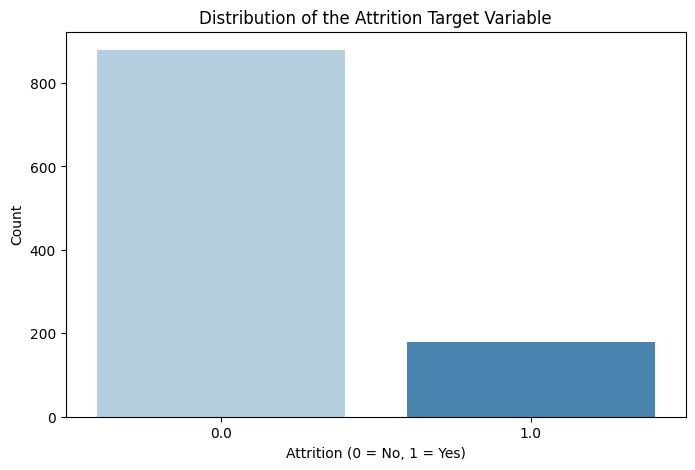

In [10]:
# Visualizing the distribution of the Attrition target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Attrition', palette="Blues")
plt.title("Distribution of the Attrition Target Variable")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

**Visualisasi Distribusi Variabel Target Attrition**

Visualisasi di atas menampilkan distribusi jumlah karyawan berdasarkan status *Attrition*:

- **0 = Tidak Resign**: Mayoritas karyawan masih bertahan di perusahaan.
- **1 = Resign**: Hanya sebagian kecil karyawan yang keluar dari perusahaan.

Distribusi ini divisualisasikan menggunakan **bar chart**, yang menunjukkan bahwa data memiliki **kelas yang tidak seimbang** (imbalanced classes).

#### Analisis Fitur Numerik

In [11]:
# Numerical Variable Distributions
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['EmployeeId',
 'Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [12]:
numerical_description = df[numerical_columns].describe()
numerical_description

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1058.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,735.50,36.92,0.17,802.49,9.19,2.91,1.00,2.72,65.89,2.73,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,424.50,9.14,0.38,403.51,8.11,1.02,0.00,1.09,20.33,0.71,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,1.00,18.00,0.00,102.00,1.00,1.00,1.00,1.00,30.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,368.25,30.00,0.00,465.00,2.00,2.00,1.00,2.00,48.00,2.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,735.50,36.00,0.00,802.00,7.00,3.00,1.00,3.00,66.00,3.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,1102.75,43.00,0.00,1157.00,14.00,4.00,1.00,4.00,83.75,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,1470.00,60.00,1.00,1499.00,29.00,5.00,1.00,4.00,100.00,4.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


**Statistik Deskriptif Variabel Numerik**

Tabel di atas merupakan ringkasan statistik deskriptif dari seluruh kolom numerik dalam dataset. Beberapa terdapat temuan penting diantaranya:
- Kolom seperti `StandardHours` dan `EmployeeCount` memiliki nilai tetap (standar deviasi = 0), sehingga kurang informatif untuk analisis.
- `Age` memiliki rata-rata sekitar 37 tahun, dengan rentang usia antara 18 hingga 60 tahun.
- `DistanceFromHome` menunjukkan sebaran yang luas dari 1 hingga 29 km.
- `TotalWorkingYears` dan `YearsAtCompany` memiliki nilai maksimum hingga 40 tahun, yang bisa jadi penting untuk analisis loyalitas dan pengalaman kerja.


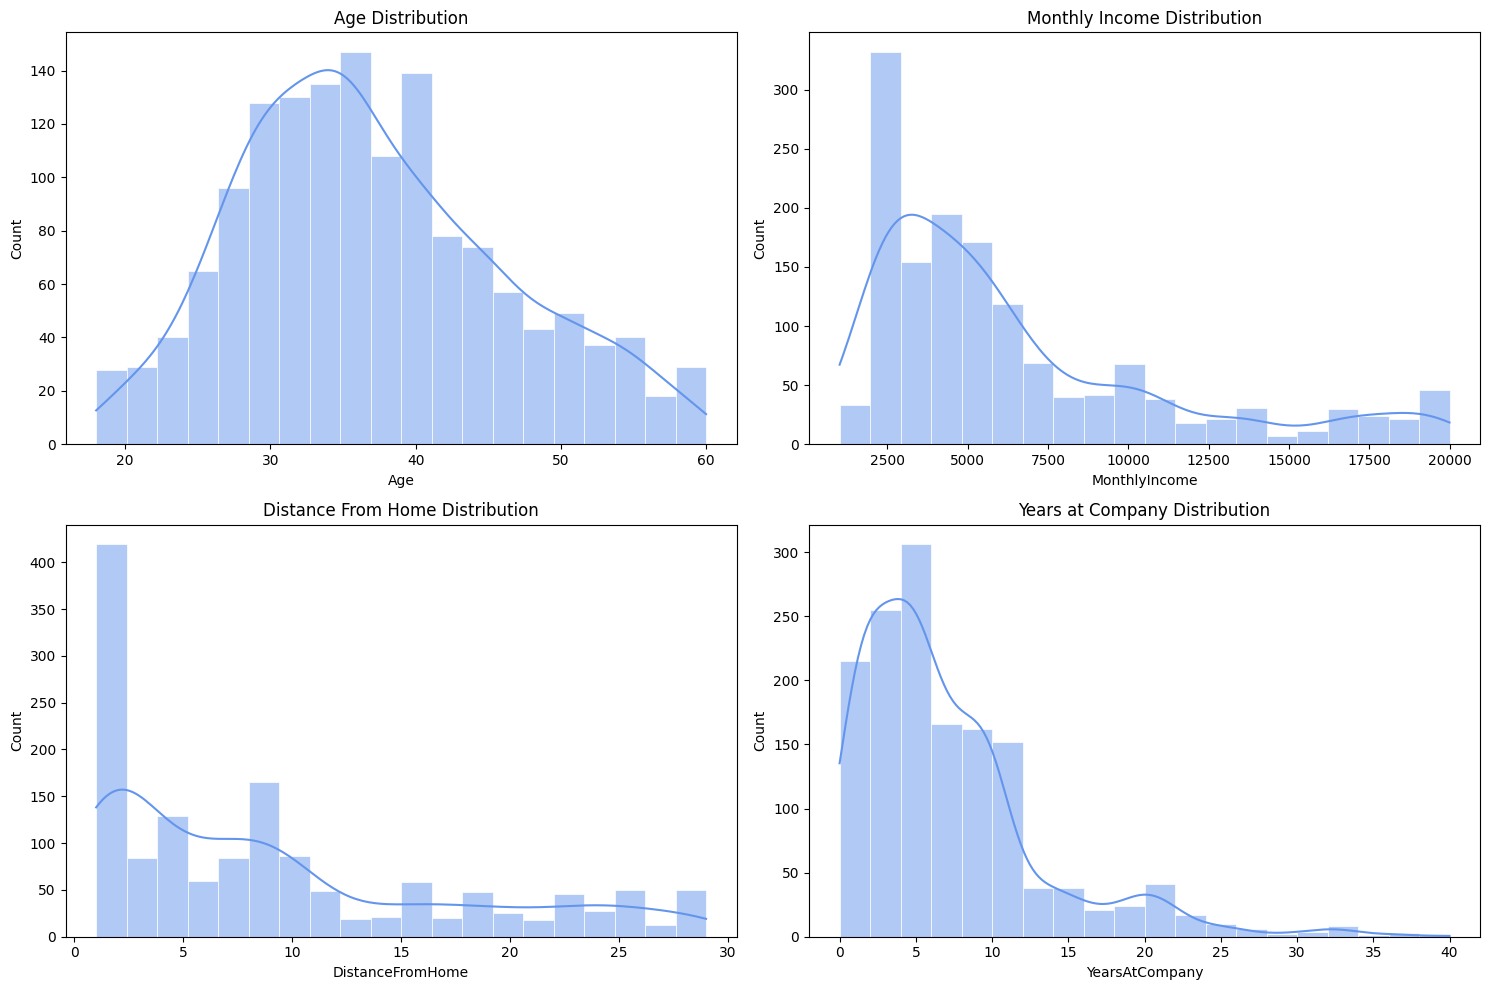

In [13]:
# Visualizing Numerical Column Distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()  

# List of columns and their titles to display
columns_titles = [
    ('Age', "Age Distribution"),
    ('MonthlyIncome', "Monthly Income Distribution"),
    ('DistanceFromHome', "Distance From Home Distribution"),
    ('YearsAtCompany', "Years at Company Distribution")
]

# Define custom blue color (matches example)
custom_blue = "#6495ED"  # Light sky blue

for i, (col, title) in enumerate(columns_titles):
    sns.histplot(
        df[col], 
        bins=20, 
        kde=True, 
        ax=axes[i],
        color=custom_blue,  
        edgecolor="white",  
        linewidth=0.5      
    )
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

**Distribusi Variabel Numerik Terpilih**

Visualisasi ini menampilkan distribusi dari empat variabel numerik utama dalam dataset karyawan:

- **Age Distribution**  
  Distribusi usia menunjukkan pola mendekati normal dengan puncak pada rentang usia 30–40 tahun. Sebagian besar karyawan berusia antara 25 hingga 45 tahun.

- **Monthly Income Distribution**  
  Distribusi penghasilan bulanan bersifat right-skewed. Mayoritas karyawan memiliki pendapatan di bawah 6.000, meskipun ada yang memperoleh hingga 20.000.

- **Distance From Home Distribution**  
  Sebaran jarak tempat tinggal dari kantor bersifat sangat right-skewed, dengan sebagian besar karyawan tinggal dalam jarak kurang dari 5 km dari tempat kerja.

- **Years at Company Distribution**  
  Distribusi lama bekerja didominasi oleh karyawan dengan masa kerja kurang dari 10 tahun. Ada lonjakan pada angka 5 tahun dan sedikit puncak tambahan di angka 20 tahun.


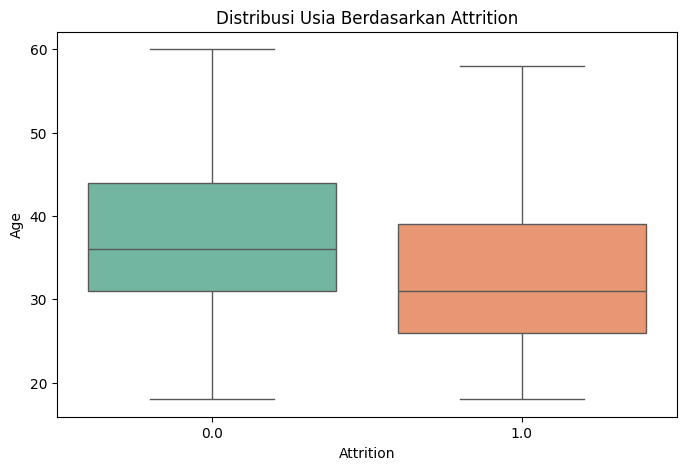

In [ ]:
# Boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='Age', palette="Set2")
plt.title("Distribusi Usia Berdasarkan Attrition")
plt.show()

**Distribusi Usia Berdasarkan Attrition**

Boxplot ini memperlihatkan perbandingan distribusi usia antara karyawan yang keluar (`Attrition` = 1) dan yang tetap bekerja (`Attrition` = 0):

- Karyawan yang keluar cenderung memiliki usia lebih muda, dengan median sekitar awal 30-an.
- Karyawan yang tetap bekerja memiliki sebaran usia yang lebih luas, dengan median mendekati usia pertengahan 30-an hingga 40-an.
- Rentang usia karyawan yang bertahan lebih besar dibandingkan yang keluar, menunjukkan bahwa karyawan lebih senior cenderung tetap bertahan di perusahaan.

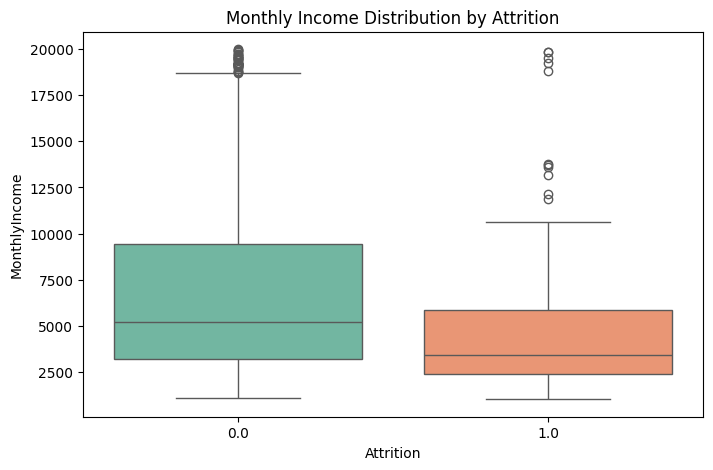

In [15]:
# Boxplot for MonthlyIncome
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="Set2")
plt.title("Monthly Income Distribution by Attrition")
plt.show()

**Distribusi Pendapatan Bulanan Berdasarkan Attrition**

Visualisasi ini menunjukkan distribusi pendapatan bulanan antara karyawan yang keluar (`Attrition` = 1) dan yang tetap bertahan (`Attrition` = 0):

- Karyawan yang tetap bekerja memiliki pendapatan bulanan median yang lebih tinggi dibandingkan mereka yang keluar.
- Rentang pendapatan karyawan yang bertahan lebih lebar dan memiliki lebih banyak outlier di kisaran atas (gaji tinggi).
- Karyawan yang keluar cenderung memiliki pendapatan yang lebih rendah, dengan persebaran yang lebih sempit.

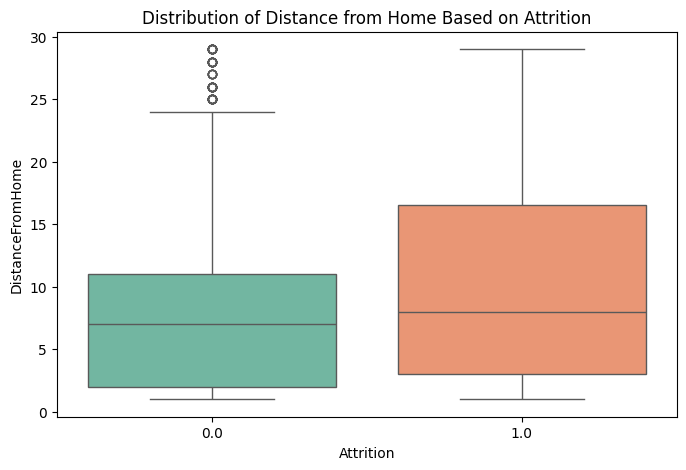

In [16]:
# Boxplot for DistanceFromHome
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette="Set2")
plt.title("Distribution of Distance from Home Based on Attrition")
plt.show()

**Distribusi Jarak dari Rumah Berdasarkan Attrition**

Visualisasi ini menggambarkan perbedaan jarak tempat tinggal karyawan dari rumah ke kantor antara mereka yang keluar (`Attrition` = 1) dan yang tetap (`Attrition` = 0):

- Median jarak karyawan yang keluar lebih tinggi dibandingkan yang bertahan.
- Rentang distribusi karyawan yang keluar juga lebih lebar, menunjukkan adanya kecenderungan bahwa jarak yang jauh bisa berkontribusi terhadap attrition.
- Karyawan yang bertahan cenderung tinggal lebih dekat ke kantor, meskipun terdapat beberapa outlier dengan jarak yang sangat jauh.

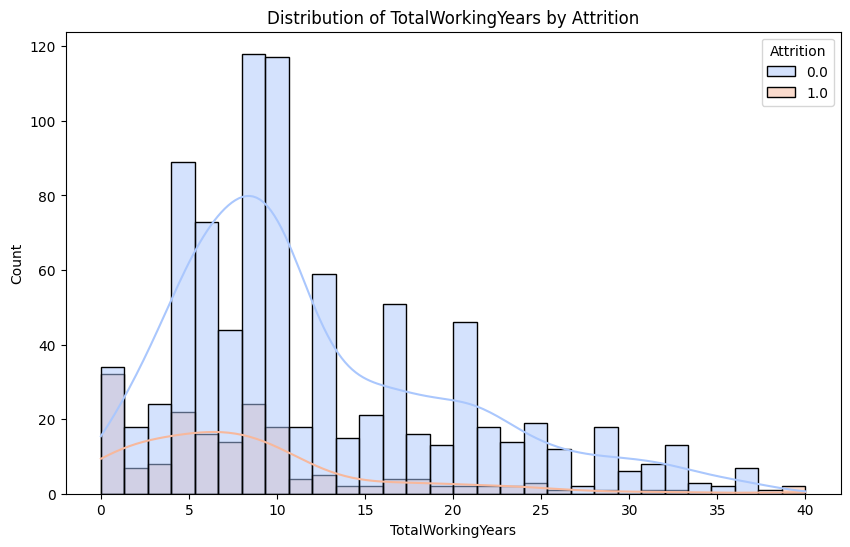

In [17]:
# TotalWorkingYears distribution visualization for Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="TotalWorkingYears", hue="Attrition", kde=True, palette="coolwarm", bins=30)
plt.title("Distribution of TotalWorkingYears by Attrition")
plt.xlabel("TotalWorkingYears")
plt.ylabel("Count")
plt.show()

**Distribusi TotalWorkingYears Berdasarkan Attrition**

Visualisasi ini menunjukkan sebaran total tahun pengalaman kerja karyawan yang keluar (`Attrition` = 1) dan yang bertahan (`Attrition` = 0):

- Karyawan yang keluar cenderung memiliki total pengalaman kerja yang lebih rendah, terutama di bawah 10 tahun.
- Sebaliknya, karyawan yang memiliki pengalaman kerja lebih panjang cenderung bertahan di perusahaan.
- Kurva KDE memperjelas bahwa puncak distribusi untuk karyawan yang keluar berada di tahun-tahun awal karier.
- Hal ini menunjukkan bahwa karyawan dengan sedikit pengalaman lebih mungkin untuk keluar dibanding mereka yang sudah lebih lama berkarier.

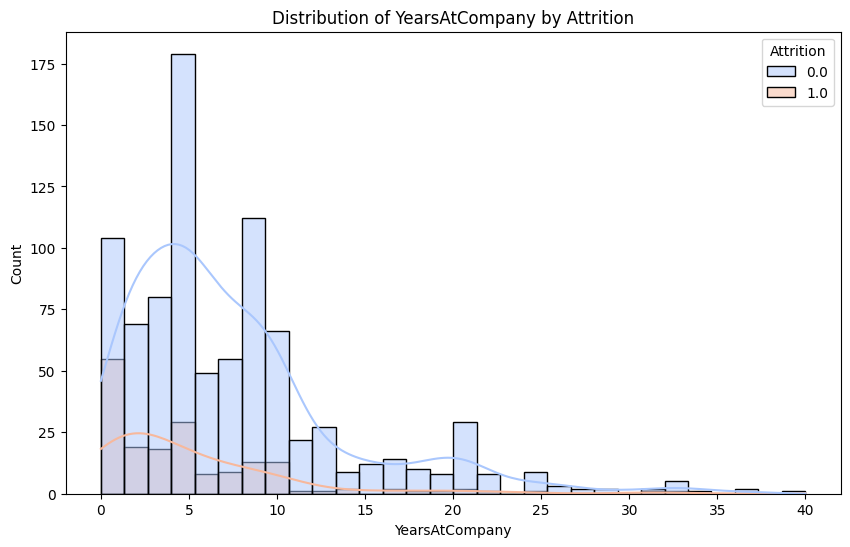

In [18]:
# YearsAtCompany distribution visualization for Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="YearsAtCompany", hue="Attrition", kde=True, palette="coolwarm", bins=30)
plt.title("Distribution of YearsAtCompany by Attrition")
plt.xlabel("YearsAtCompany")
plt.ylabel("Count")
plt.show()

**Distribusi YearsAtCompany Berdasarkan Attrition**

Visualisasi ini menggambarkan sebaran jumlah tahun karyawan bekerja di perusahaan berdasarkan status attrition:

- Karyawan yang keluar (Attrition = 1) cenderung memiliki masa kerja yang lebih pendek, terutama di bawah 5 tahun.
- Sebaliknya, karyawan yang bertahan (Attrition = 0) tersebar lebih luas dengan puncak di sekitar 4–5 tahun, dan masih signifikan di tahun-tahun berikutnya.
- Pola ini mengindikasikan bahwa masa kerja yang lebih pendek berkorelasi dengan tingkat attrition yang lebih tinggi.
- Kurva KDE mempertegas bahwa kemungkinan keluar lebih tinggi di awal masa kerja.

Text(0.5, 1.0, 'Attrition Rate by Salary Band')

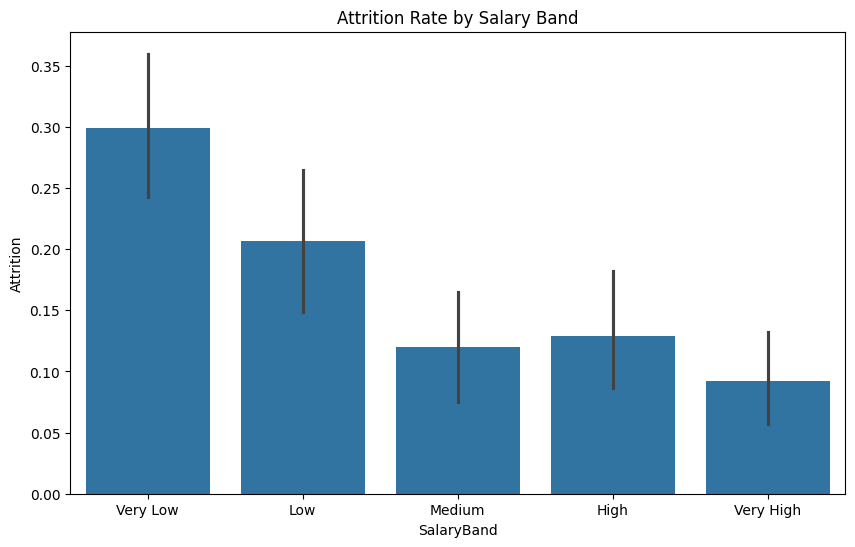

In [19]:
# Create salary bands
df['SalaryBand'] = pd.qcut(df['MonthlyIncome'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Plot attrition by salary band
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='SalaryBand', y='Attrition')
plt.title('Attrition Rate by Salary Band')

**Tingkat Attrition Berdasarkan Kelompok Gaji (Salary Band)**

Visualisasi ini menunjukkan perbandingan rata-rata tingkat `attrition` (pengunduran diri karyawan) di setiap kelompok gaji (Salary Band) yang berbeda.

- Kelompok gaji 'Very Low' memiliki tingkat *attrition* tertinggi, yaitu sekitar 30%.
- Tingkat *attrition* cenderung menurun seiring dengan kenaikan kelompok gaji, dengan kelompok 'Low' sekitar 21%, 'Medium' sekitar 12%, dan 'High' sekitar 13%.
- Kelompok gaji 'Very High' menunjukkan tingkat *attrition* terendah, yaitu di bawah 10%.
- Pola ini mengindikasikan bahwa karyawan dengan gaji lebih rendah memiliki kecenderungan lebih tinggi untuk meninggalkan perusahaan dibandingkan dengan mereka yang memiliki gaji lebih tinggi.

Text(0.5, 1.0, 'Years at Company vs Attrition')

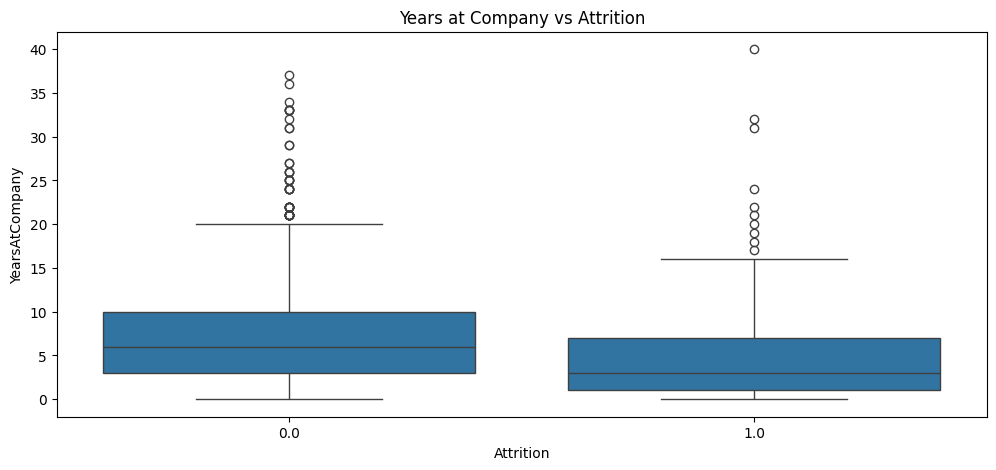

In [20]:
# Create tenure groups
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company vs Attrition')

**Lama Bekerja di Perusahaan (YearsAtCompany) vs. Status Attrition**

Visualisasi *boxplot* ini membandingkan distribusi lama bekerja karyawan di perusahaan (`YearsAtCompany`) antara karyawan yang mengalami `attrition` (keluar, ditandai dengan '1.0') dan yang tidak (bertahan, ditandai dengan '0.0').

- Karyawan yang mengalami *attrition* (1.0) cenderung memiliki masa kerja yang jauh lebih pendek. Median lama bekerja untuk kelompok ini berada di sekitar 1-2 tahun, dengan sebagian besar (interquartile range) bekerja antara 0 hingga sekitar 7 tahun.
- Sebaliknya, karyawan yang tidak mengalami *attrition* (0.0) menunjukkan median lama bekerja yang lebih tinggi, yaitu sekitar 5-6 tahun. Distribusi masa kerja mereka juga lebih luas, dengan interquartile range berkisar antara sekitar 3 hingga 10 tahun.
- Meskipun kedua kelompok memiliki *outlier* yang menunjukkan masa kerja yang sangat panjang (hingga 40 tahun), pola umum menunjukkan bahwa karyawan yang keluar cenderung memiliki masa kerja yang lebih singkat secara signifikan.
- Ini mengindikasikan bahwa karyawan yang baru bekerja atau memiliki masa kerja relatif pendek lebih rentan terhadap *attrition*.

#### Analisis Interaksi Antar Fitur

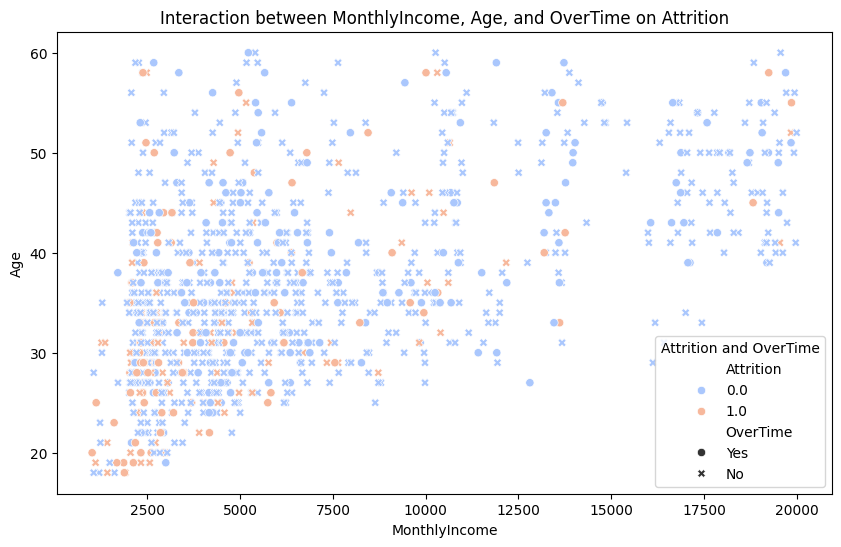

In [ ]:
# Visualisasi interaction between MonthlyIncome and OverTime on Attrition
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MonthlyIncome", y="Age", hue="Attrition", style="OverTime", palette="coolwarm")
plt.title("Interaction between MonthlyIncome, Age, and OverTime on Attrition")
plt.xlabel("MonthlyIncome")
plt.ylabel("Age")
plt.legend(title="Attrition and OverTime")
plt.show()

**Interaksi Pendapatan Bulanan, Usia, dan Lembur terhadap Attrition**

Scatterplot ini memetakan `MonthlyIncome` (Pendapatan Bulanan) vs. `Age` (Usia). Warna titik menunjukkan `Attrition` (oranye muda = keluar/1.0, biru muda = bertahan/0.0), dan bentuk marker menandakan `OverTime` (lingkaran = Ya, 'x' = Tidak).

- Karyawan yang *attrition* (oranye muda) cenderung terkonsentrasi pada pendapatan rendah dan usia muda.
- Sebaliknya, karyawan yang bertahan (biru muda) tersebar lebih luas di berbagai tingkat pendapatan dan usia.
- Banyak kasus *attrition* (oranye muda) juga disertai lembur (lingkaran), terutama pada kelompok usia muda dengan pendapatan rendah, meskipun *attrition* juga terjadi tanpa lembur.
- Ini mengindikasikan karyawan muda dengan pendapatan rendah lebih rentan *attrition*, dan lembur seringkali terkait dengan *attrition* pada kelompok ini.

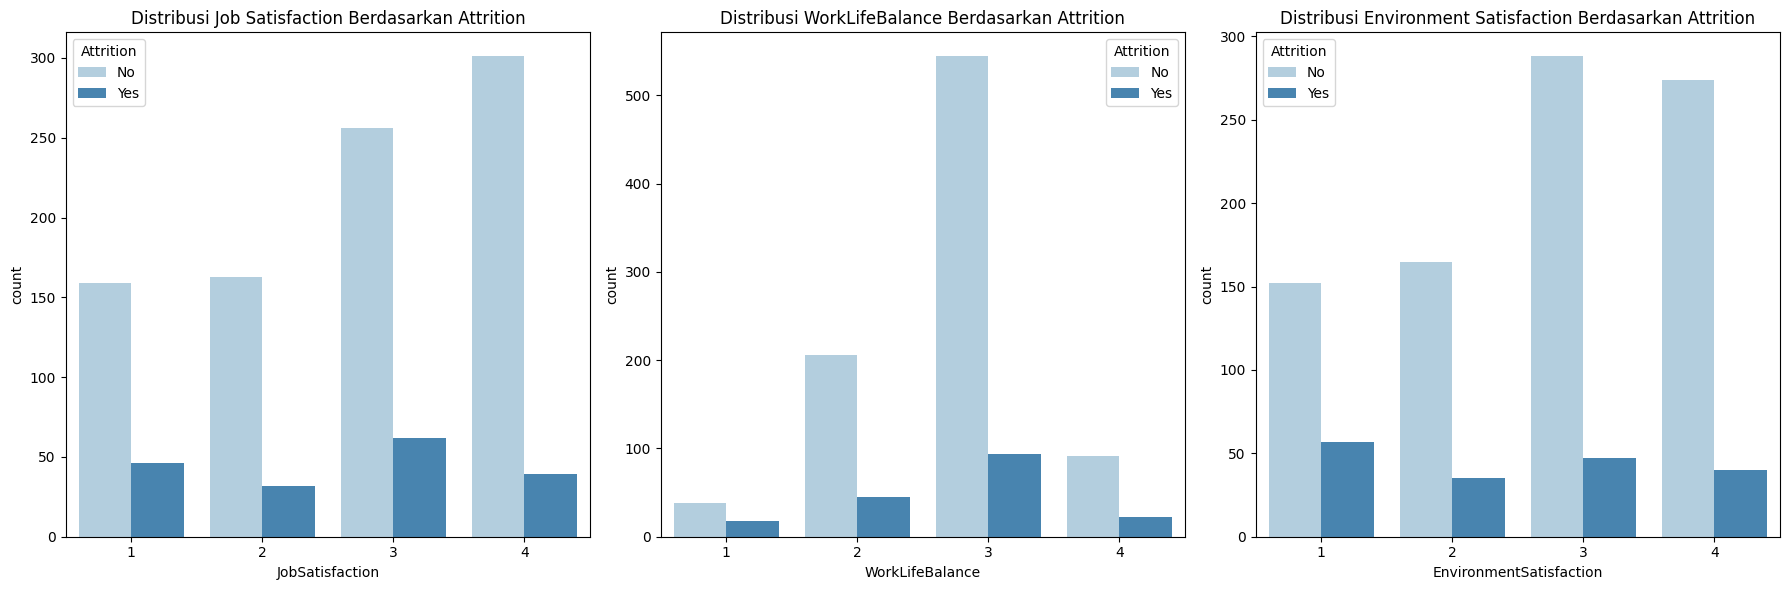

In [22]:
# Visualization of categorical distribution based on Attrition with blue color theme
variables = ['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
blue_palette = sns.color_palette("Blues", n_colors=2)

for ax, col in zip(axes, variables):
    sns.countplot(data=df, x=col, hue='Attrition', ax=ax, palette=blue_palette)
    ax.set_title(f'Distribusi {col.replace("Satisfaction", " Satisfaction")} Berdasarkan Attrition')
    ax.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

**Distribusi Tingkat Kepuasan dan Keseimbangan Kerja Berdasarkan Attrition**

Tiga *barplot* ini menggambarkan distribusi `JobSatisfaction` (Kepuasan Kerja), `WorkLifeBalance` (Keseimbangan Kehidupan Kerja), dan `EnvironmentSatisfaction` (Kepuasan Lingkungan) berdasarkan status `Attrition` (biru muda = Tidak, biru tua = Ya).

- Karyawan yang mengalami *attrition* (biru tua) menunjukkan konsentrasi yang lebih tinggi pada tingkat kepuasan/keseimbangan yang lebih rendah (terutama level 1) untuk ketiga aspek.
- Sebaliknya, karyawan yang tidak *attrition* (biru muda) cenderung memiliki tingkat kepuasan/keseimbangan yang lebih tinggi (umumnya level 3 dan 4).
- Ini mengindikasikan bahwa tingkat kepuasan kerja, keseimbangan kehidupan kerja, dan kepuasan lingkungan yang rendah berkorelasi dengan kecenderungan *attrition* yang lebih tinggi.

#### Analisis Hubungan Fitur Kategorikal terhadap Target

In [23]:
# Categorical Column Distribution
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'SalaryBand']

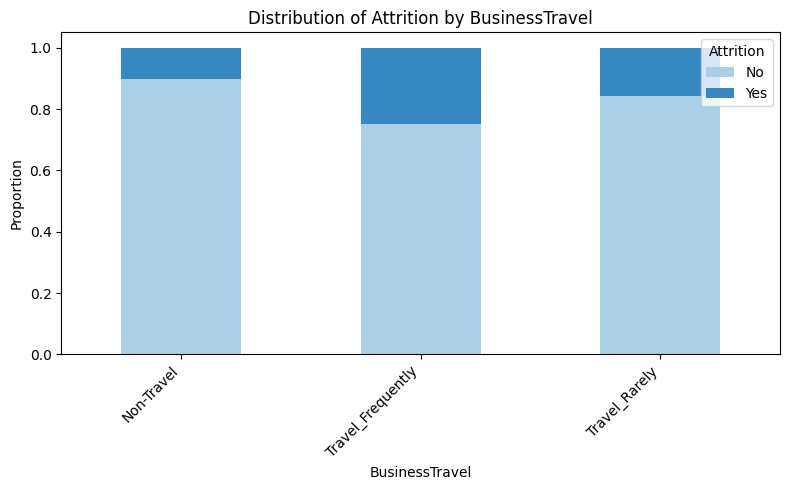

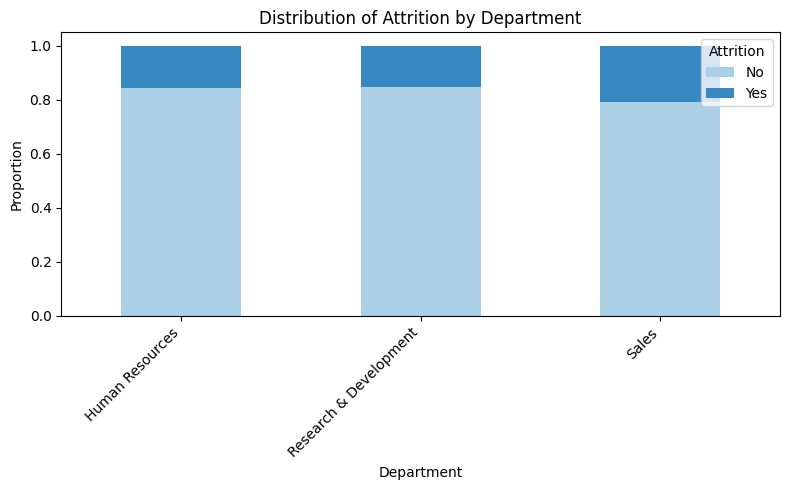

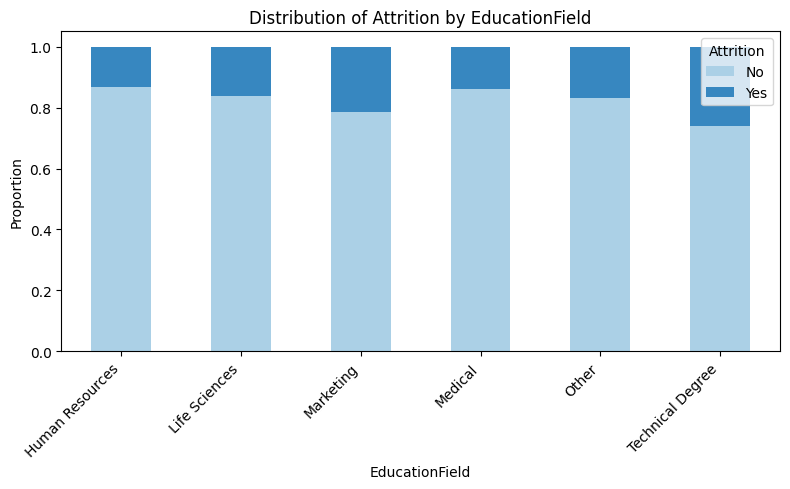

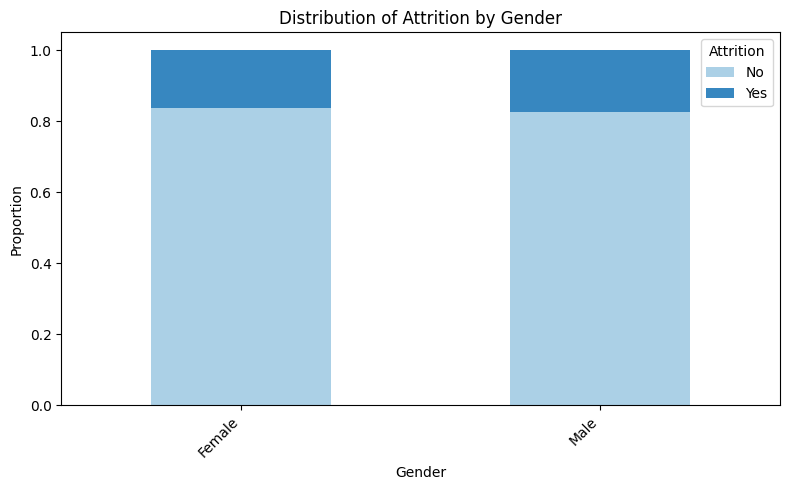

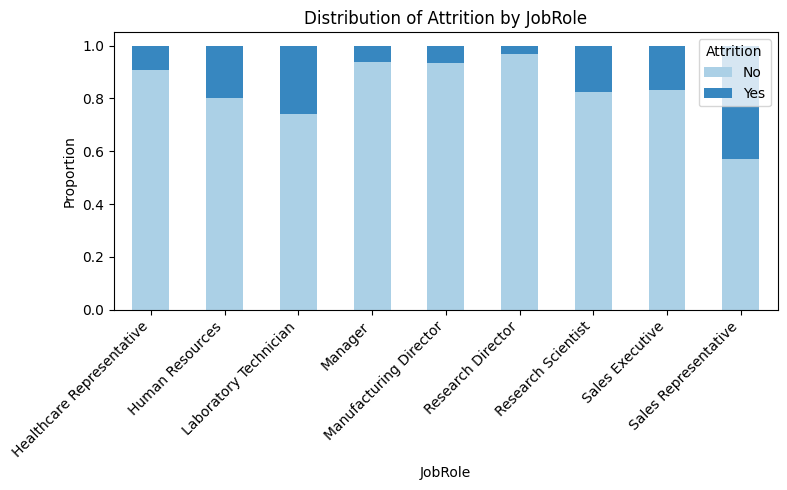

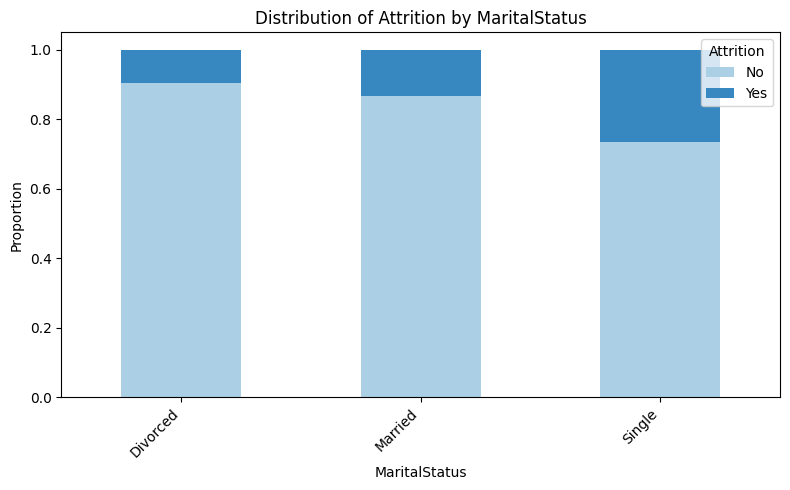

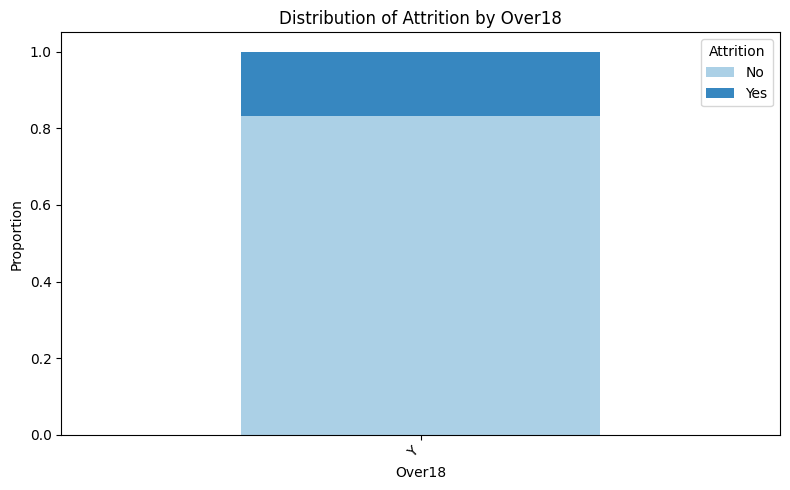

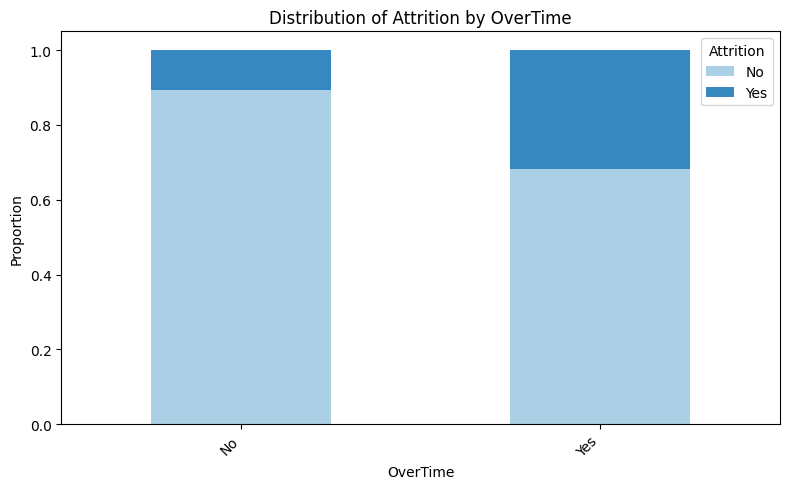

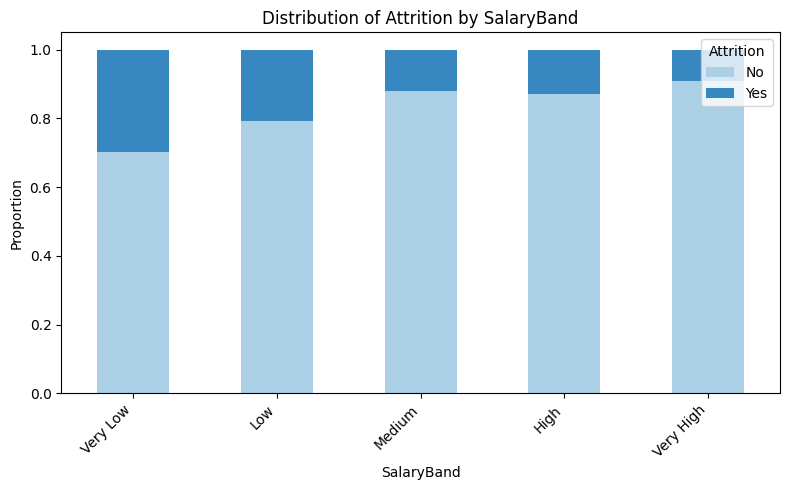

In [24]:
# Visualization of categorical features against Attrition using Stacked Bar Chart (Blue Theme)
for feature in categorical_columns:
    contingency_table = pd.crosstab(df[feature], df['Attrition'])
    blue_colors = sns.color_palette("Blues", n_colors=2)
    (contingency_table.div(contingency_table.sum(1), axis=0)).plot(
        kind='bar', 
        stacked=True, 
        figsize=(8, 5),
        color=blue_colors
    )
    plt.title(f"Distribution of Attrition by {feature}")
    plt.ylabel("Proportion")
    plt.xlabel(feature)
    plt.legend(title="Attrition", labels=['No', 'Yes'], loc="upper right")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Distribusi Proporsi Attrition Berdasarkan Berbagai Fitur Kategorikal**

Serangkaian *stacked bar chart* ini menampilkan proporsi karyawan yang mengalami *attrition* (biru tua = Ya) dan yang tidak (biru muda = Tidak) untuk berbagai kategori dalam beberapa fitur. Sumbu Y menunjukkan proporsi.

- **`BusinessTravel`**: Proporsi *attrition* tertinggi terlihat pada karyawan yang 'Travel_Frequently'.
- **`Department`**: Departemen 'Sales' dan 'Human Resources' menunjukkan proporsi *attrition* yang relatif lebih tinggi.
- **`EducationField`**: Bidang 'Human Resources' dan 'Technical Degree' memiliki proporsi *attrition* yang lebih menonjol.
- **`Gender`**: Distribusi *attrition* tampak serupa antara 'Female' dan 'Male'.
- **`JobRole`**: Peran seperti 'Sales Representative', 'Laboratory Technician', dan 'Human Resources' menunjukkan proporsi *attrition* yang lebih tinggi.
- **`MaritalStatus`**: Karyawan dengan status 'Single' memiliki proporsi *attrition* tertinggi.
- **`Over18`**: Fitur ini tidak menunjukkan variasi karena semua karyawan diasumsikan 'Over 18'.
- **`OverTime`**: Karyawan yang bekerja lembur ('Yes') memiliki proporsi *attrition* yang jauh lebih tinggi dibandingkan yang tidak.
- **`SalaryBand`**: Kelompok gaji 'Very Low' dan 'Low' menunjukkan proporsi *attrition* yang lebih tinggi, yang menurun seiring kenaikan kelompok gaji.

#### Korelasi Fitur Numerik terhadap Target

In [ ]:
# Correlation between columns Numeric
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeId,1.00,0.01,-0.02,0.03,-0.02,0.00,NaN,-0.00,0.00,-0.03,...,-0.02,NaN,-0.04,0.00,0.04,0.01,-0.02,-0.01,-0.02,-0.02
Age,0.01,1.00,-0.17,0.01,-0.00,0.21,NaN,0.01,0.02,0.03,...,0.05,NaN,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,-0.02,-0.17,1.00,-0.05,0.08,-0.03,NaN,-0.13,-0.02,-0.15,...,-0.05,NaN,-0.16,-0.18,-0.05,-0.06,-0.14,-0.16,-0.03,-0.16
DailyRate,0.03,0.01,-0.05,1.00,-0.00,-0.02,NaN,0.02,0.02,0.05,...,0.01,NaN,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.02,-0.00,0.08,-0.00,1.00,0.02,NaN,-0.02,0.03,0.01,...,0.01,NaN,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.00,0.21,-0.03,-0.02,0.02,1.00,NaN,-0.03,0.02,0.04,...,-0.01,NaN,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.00,0.01,-0.13,0.02,-0.02,-0.03,NaN,1.00,-0.05,-0.01,...,0.01,NaN,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.00,0.02,-0.02,0.02,0.03,0.02,NaN,-0.05,1.00,0.04,...,0.00,NaN,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,-0.03,0.03,-0.15,0.05,0.01,0.04,NaN,-0.01,0.04,1.00,...,0.03,NaN,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03


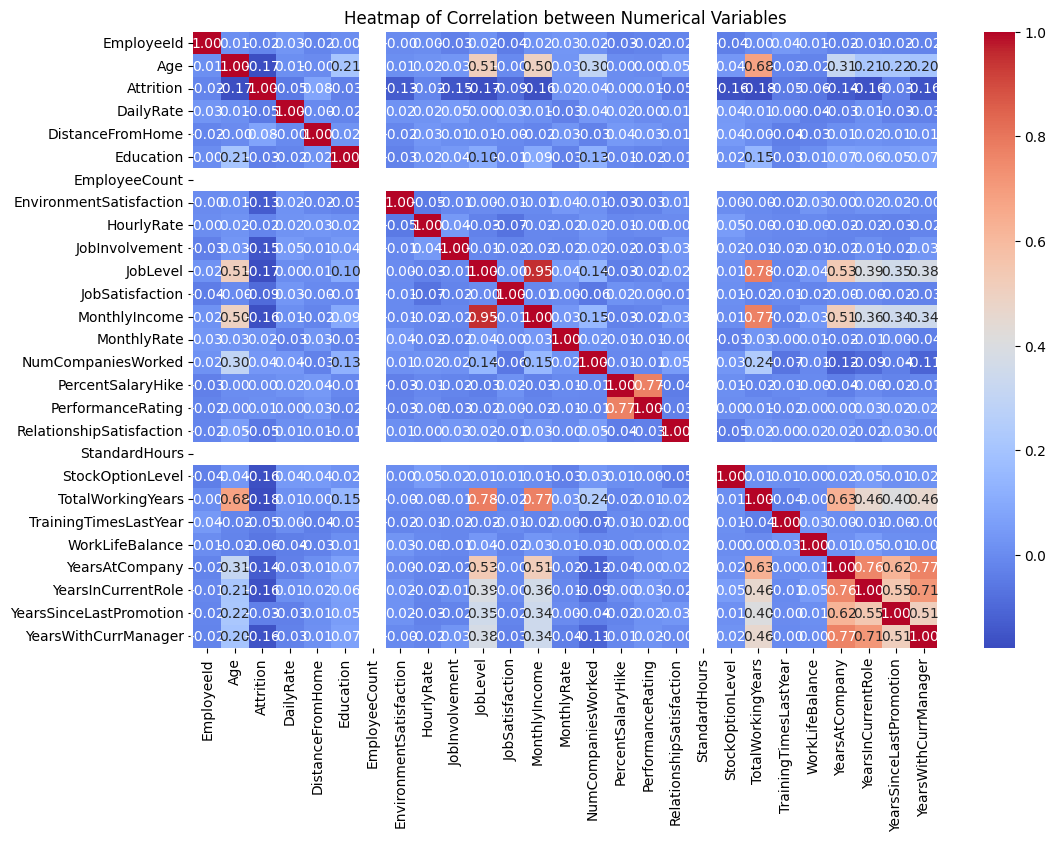

In [ ]:
# Heatmap Visualization of Correlation Between Numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation between Numerical Variables")
plt.show()

**Heatmap Korelasi Antar Variabel Numerik**

Heatmap ini menyajikan matriks korelasi antar variabel numerik dalam dataset. Warna sel merepresentasikan koefisien korelasi: merah menunjukkan korelasi positif, biru menunjukkan korelasi negatif, dan intensitas warna serta angka di dalamnya menunjukkan kekuatan korelasi.

- `Attrition` menunjukkan korelasi negatif lemah dengan `Age` (-0.17), `JobLevel` (-0.17), `MonthlyIncome` (-0.16), dan `TotalWorkingYears` (-0.18). Ini mengindikasikan bahwa seiring meningkatnya nilai variabel-variabel tersebut, kecenderungan *attrition* cenderung sedikit menurun.
- Terdapat korelasi positif yang sangat kuat antara `JobLevel` dan `MonthlyIncome` (0.95).
- `TotalWorkingYears` juga memiliki korelasi positif yang kuat dengan `JobLevel` (0.78) dan `MonthlyIncome` (0.77).
- Variabel-variabel yang berkaitan dengan masa kerja seperti `YearsAtCompany`, `YearsInCurrentRole`, dan `YearsWithCurrManager` juga menunjukkan korelasi positif yang kuat satu sama lain (misalnya, `YearsAtCompany` dengan `YearsWithCurrManager` sebesar 0.77).

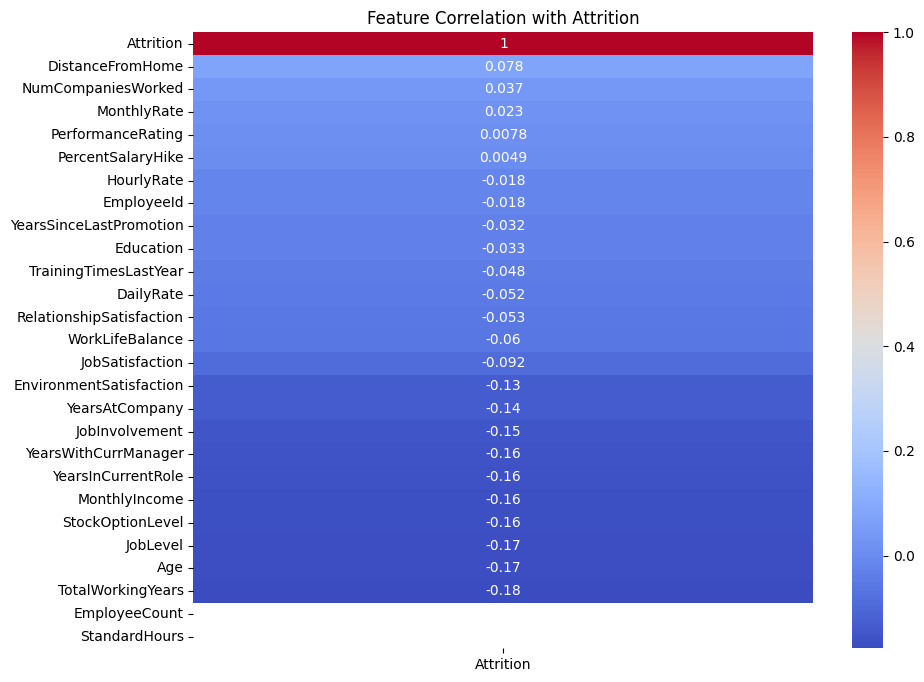

In [27]:
# Correlation of Numeric Features with Attrition
corr_matrix = df.corr(numeric_only=True)

# Visualisasi Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Attrition")
plt.show()

#### Korelasi Fitur Kategorikal terhadap Target

**Cramér's V**

In [28]:
# Function to compute Cramér's V
def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

results = []

print(f"{'Feature':<20} {'p-value':<10} {'Cramér\'s V':<10} {'Include'}")
print("-"*50)

for feature in categorical_columns:
    conf_matrix = pd.crosstab(df[feature], df['Attrition'])
    chi2, p, _, _ = chi2_contingency(conf_matrix)
    
    if p < 0.05:
        v = cramers_v(conf_matrix)
        include = "Yes" if v > 0.1 else "No"
        results.append({'Feature': feature, "Cramér's V": v, "p-value": p})
    else:
        v = np.nan
        include = "Not Significant"

    # Print result for each feature
    print(f"{feature:<20} {p:<10.4f} {v:<10.4f} {include}")

# Create DataFrame from significant features
cramer_with_target_df = pd.DataFrame(results)
if not cramer_with_target_df.empty:
    cramer_with_target_df = cramer_with_target_df.sort_values(by="Cramér's V", ascending=False).reset_index(drop=True)

Feature              p-value    Cramér's V Include
--------------------------------------------------
BusinessTravel       0.0012     0.1126     Yes
Department           0.0989     nan        Not Significant
EducationField       0.0808     nan        Not Significant
Gender               0.6646     nan        Not Significant
JobRole              0.0000     0.2505     Yes
MaritalStatus        0.0000     0.1886     Yes
Over18               1.0000     nan        Not Significant
OverTime             0.0000     0.2531     Yes
SalaryBand           0.0000     0.2018     Yes


**Hasil Uji Asosiasi Fitur Kategorikal dengan Attrition (Chi-squared & Cramér's V)**

Tabel ini merangkum hasil uji Chi-squared dan nilai Cramér's V untuk mengidentifikasi fitur-fitur kategorikal yang memiliki asosiasi statistik signifikan dengan `Attrition`. Fitur dipertimbangkan ("Include" = Yes) jika p-value < 0.05 dan Cramér's V > 0.1.

- Fitur-fitur dengan asosiasi signifikan dan cukup kuat terhadap `Attrition`, diurutkan berdasarkan kekuatan (Cramér's V tertinggi):
    - `OverTime` (V = 0.2531)
    - `JobRole` (V = 0.2505)
    - `SalaryBand` (V = 0.2018)
    - `MaritalStatus` (V = 0.1886)
    - `BusinessTravel` (V = 0.1126)
- Fitur seperti `Department`, `EducationField`, `Gender`, dan `Over18` tidak menunjukkan asosiasi yang signifikan secara statistik atau memiliki kekuatan asosiasi yang sangat rendah dengan `Attrition`.
- Ini menunjukkan bahwa `OverTime`, `JobRole`, `SalaryBand`, `MaritalStatus`, dan `BusinessTravel` adalah kandidat fitur yang lebih baik untuk memprediksi `Attrition`.

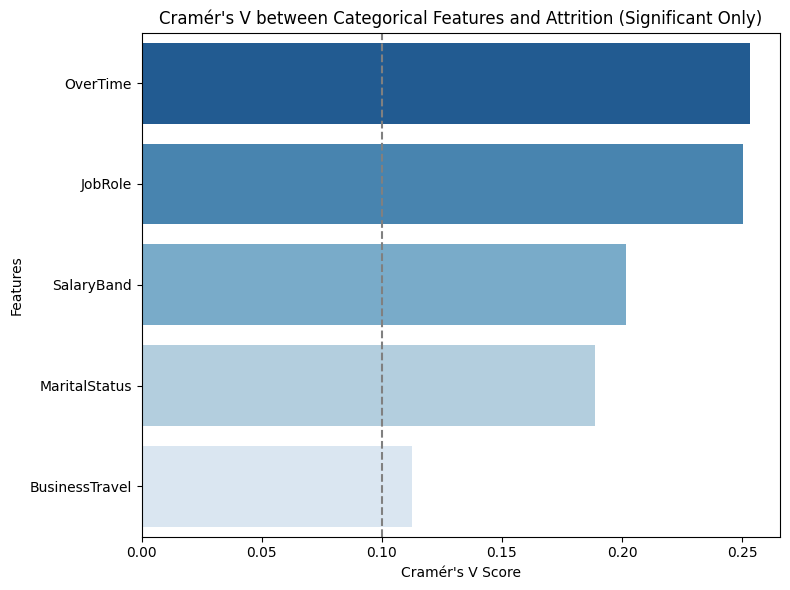

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Cramér's V", y='Feature', data=cramer_with_target_df, palette="Blues_r")
plt.title("Cramér's V between Categorical Features and Attrition (Significant Only)")
plt.xlabel("Cramér's V Score")
plt.ylabel("Features")
plt.axvline(0.1, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

**Kekuatan Asosiasi Fitur Kategorikal Signifikan dengan Attrition (Cramér's V)**

Visualisasi *bar chart* horizontal ini menampilkan skor Cramér's V untuk fitur-fitur kategorikal yang memiliki asosiasi signifikan dengan `Attrition`. Fitur diurutkan berdasarkan kekuatan asosiasi, dengan garis putus-putus vertikal pada 0.1 menandakan ambang batas relevansi yang digunakan.

- `OverTime` menunjukkan asosiasi terkuat dengan `Attrition`, diikuti oleh `JobRole`.
- `SalaryBand`, `MaritalStatus`, dan `BusinessTravel` juga menunjukkan asosiasi yang relevan (Cramér's V > 0.1).
- Fitur dengan skor Cramér's V lebih tinggi memiliki hubungan yang lebih kuat dengan `Attrition`.

## Data Preparation / Preprocessing

#### Missing Values pada `Attrition`

In [30]:
# Check if there are any NaN values in the 'Attrition' column
if df['Attrition'].isna().any():
    print("There are NaN values in the 'Attrition' column.")
else:
    print("There are no NaN values in the 'Attrition' column.")

# Optional: Show the total number of missing values
nan_count = df['Attrition'].isna().sum()
print(f"Total NaN values in 'Attrition': {nan_count}")

There are NaN values in the 'Attrition' column.
Total NaN values in 'Attrition': 412


In [31]:
# Drop all rows that have any NaN values
df_cleaned = df.dropna().copy()

# Convert Attrition to integer (if it's binary: 1 for Yes, 0 for No)
df_cleaned['Attrition'] = df_cleaned['Attrition'].astype(int)

print(f"Data after dropping all NaN rows: {len(df_cleaned)} rows")

Data after dropping all NaN rows: 1058 rows


In [32]:
# After cleaning: Check again for NaN in Attrition
print("After Cleaning:")
if df_cleaned['Attrition'].isna().any():
    print("There are still NaN values in 'Attrition' after cleaning.")
else:
    print("No more NaN values in 'Attrition' after cleaning.")

nan_count_after = df_cleaned['Attrition'].isna().sum()
print(f"Total NaN values in 'Attrition' after cleaning: {nan_count_after}")

# Show total number of rows (data) after cleaning
print(f"Total data after cleaning: {len(df_cleaned)} rows")

After Cleaning:
No more NaN values in 'Attrition' after cleaning.
Total NaN values in 'Attrition' after cleaning: 0
Total data after cleaning: 1058 rows


In [33]:
df_cleaned.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryBand
1,2,37,1,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,80,0,15,2,1,1,0,0,0,Medium
2,3,51,1,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,80,3,18,2,4,10,0,2,7,Very Low
3,4,42,0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,80,1,23,2,4,20,4,4,8,Very High
6,7,40,0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,80,3,6,2,2,4,3,0,2,High
7,8,55,1,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,80,1,24,2,3,5,2,1,4,Very High


#### Pengecekan Outlier

In [34]:
def detect_outliers(df, columns):
    """
    Detect outliers using IQR method without modifying the data
    """
    outlier_info = {}
    outlier_samples = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        # Store outlier information
        outlier_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        # Store sample of outliers with their values and Attrition
        outlier_samples[col] = df[
            (df[col] < lower_bound) | (df[col] > upper_bound)
        ][[col, 'Attrition']].head()
        
    return outlier_info, outlier_samples

# Columns to check for outliers
columns_to_check = ['MonthlyIncome', 'DistanceFromHome', 
                   'YearsAtCompany', 'TotalWorkingYears']

# Detect outliers in cleaned data
outlier_info, outlier_samples = detect_outliers(df_cleaned, columns_to_check)

# Print outlier summary and samples
for col in columns_to_check:
    print(f"\n{'='*50}")
    print(f"Outliers in {col}:")
    print(f"Count: {outlier_info[col]['count']}")
    print(f"Percentage: {outlier_info[col]['percentage']:.2f}%")
    print(f"Bounds: [{outlier_info[col]['lower_bound']:.2f}, {outlier_info[col]['upper_bound']:.2f}]")
    print("\nSample of outliers:")
    print(outlier_samples[col])


Outliers in MonthlyIncome:
Count: 64
Percentage: 6.05%
Bounds: [-5854.12, 17490.88]

Sample of outliers:
     MonthlyIncome  Attrition
7            19859          1
17           19406          0
19           18711          0
106          19545          1
120          19845          1

Outliers in DistanceFromHome:
Count: 0
Percentage: 0.00%
Bounds: [-14.50, 29.50]

Sample of outliers:
Empty DataFrame
Columns: [DistanceFromHome, Attrition]
Index: []

Outliers in YearsAtCompany:
Count: 79
Percentage: 7.47%
Bounds: [-6.00, 18.00]

Sample of outliers:
    YearsAtCompany  Attrition
3               20          0
16              20          0
21              20          0
27              19          0
87              19          0

Outliers in TotalWorkingYears:
Count: 29
Percentage: 2.74%
Bounds: [-9.00, 31.00]

Sample of outliers:
     TotalWorkingYears  Attrition
120                 33          1
209                 32          0
229                 35          0
249                 33   

**Ringkasan Deteksi Outlier pada Fitur Numerik (Metode IQR)**

Berikut adalah hasil deteksi *outlier* untuk beberapa fitur numerik kunci:

- **`MonthlyIncome`**: Teridentifikasi 64 *outlier* (6.05% dari data).
- **`DistanceFromHome`**: Tidak ditemukan *outlier* (0.00% dari data).
- **`YearsAtCompany`**: Teridentifikasi 79 *outlier* (7.47% dari data).
- **`TotalWorkingYears`**: Teridentifikasi 29 *outlier* (2.74% dari data).

Meskipun terdeteksi, *outlier* pada fitur-fitur ini tidak dihapus. Keputusan ini diambil karena nilai-nilai yang teridentifikasi sebagai *outlier* tersebut masih dianggap masuk akal jika dikaitkan dengan kondisi di dunia nyata (misalnya, pendapatan tinggi atau masa kerja yang sangat panjang).

In [35]:
# Select features with significant p-value and moderate association
selected_categorical_features = cramer_with_target_df[
    (cramer_with_target_df['p-value'] < 0.05) & 
    (cramer_with_target_df["Cramér's V"] > 0.1)
]['Feature'].tolist()

print("Significant categorical features based on Cramér's V:", selected_categorical_features)

Significant categorical features based on Cramér's V: ['OverTime', 'JobRole', 'SalaryBand', 'MaritalStatus', 'BusinessTravel']


#### Memilih fitur menggunakan `SelectKBest`

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define numerical features based on the heatmap and data description
numerical_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
    'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole'
]

# Apply SelectKBest with ANOVA F-value to select top 6 numerical features
selector = SelectKBest(score_func=f_classif, k=6) 
X_selected = selector.fit_transform(df_cleaned[numerical_features], df_cleaned['Attrition'])

# Get selected numerical features
selected_numerical_features = numerical_features[:len(numerical_features)]
mask = selector.get_support()
selected_numerical_features = [f for f, m in zip(selected_numerical_features, mask) if m]

print("Selected numerical features:", selected_numerical_features)

Selected numerical features: ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']


In [37]:
# Combine with categorical features from earlier
final_features = selected_categorical_features + selected_numerical_features

print("\nAll selected features (categorical + numerical):")
print(final_features)


All selected features (categorical + numerical):
['OverTime', 'JobRole', 'SalaryBand', 'MaritalStatus', 'BusinessTravel', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']


In [38]:
# Ensure correct data types
df_cleaned['Attrition'] = df_cleaned['Attrition'].astype(int)

# Keep only selected features + Attrition
df_cleaned = df_cleaned[final_features + ['Attrition']]

# Check missing values in cleaned data
print("\nMissing values in df_cleaned:")
print(df_cleaned.isna().sum())

print("\nData shape after cleaning:", df_cleaned.shape)


Missing values in df_cleaned:
OverTime              0
JobRole               0
SalaryBand            0
MaritalStatus         0
BusinessTravel        0
Age                   0
DistanceFromHome      0
MonthlyIncome         0
TotalWorkingYears     0
YearsAtCompany        0
YearsInCurrentRole    0
Attrition             0
dtype: int64

Data shape after cleaning: (1058, 12)


#### Menentukan `X` & `y`

In [39]:
# Define X and y
X = df_cleaned[final_features]
y = df_cleaned['Attrition']

#### Split data 80:20

In [40]:
# Split data before any preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain-test split completed:")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Train-test split completed:
Training samples: 846
Test samples: 212


In [41]:
# Apply Ordinal Encoder only on training data
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat = encoder.fit_transform(X_train[selected_categorical_features])
X_test_cat = encoder.transform(X_test[selected_categorical_features])

#### Min-max Scaler pada `X`

In [42]:
# Scale numerical features
scaler = StandardScaler()          # Z-score normalization
X_train_num = scaler.fit_transform(X_train[selected_numerical_features])
X_test_num = scaler.transform(X_test[selected_numerical_features])

In [43]:
# Combine with categorical features
X_train_final = np.hstack([X_train_cat, X_train_num])
X_test_final = np.hstack([X_test_cat, X_test_num])

#### Menerapkan SMOTE agar seimbang

In [44]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)

In [45]:
print("\nSetelah SMOTE:")
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


Setelah SMOTE:
X_resampled shape: (1406, 11)
y_resampled shape: (1406,)


In [46]:
# Use resampled data from SMOTE and preprocessed test set
X_train_final = X_resampled
y_train_final = y_resampled
X_test_final = X_test_final
y_test_final = y_test  

## Modeling

In [47]:
# Initialize and fit LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train_final, X_test_final, y_train_final, y_test_final)

# Show top 10 models by Accuracy
print("\nTop 10 Models by Accuracy:")
print(models.sort_values(by="Accuracy", ascending=False).head(10))

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 703, number of negative: 703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1869
[LightGBM] [Info] Number of data points in the train set: 1406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Top 10 Models by Accuracy:
                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
RandomForestClassifier      0.83               0.64     0.64      0.82   
DummyClassifier             0.83               0.50     0.50      0.75   
LGBMClassifier              0.82               0.62     0.62      0.81   
BaggingClassifier           0.82               0.66     0.66      0.82   
ExtraTreesClassifier        0.

## Evaluation

#### KFold Cross-Validation

In [48]:
# Mute warnings and logs from LightGBM
warnings.filterwarnings("ignore")
os.environ['LIGHTGBM_DISABLE_LOGGING'] = '1'
logging.getLogger('lightgbm').setLevel(logging.WARNING)

# Define top 5 models from LazyPredict
models = {
    'ExtraTrees': ExtraTreesClassifier(),
    'Dummy': DummyClassifier(strategy='most_frequent'),
    'RandomForest': RandomForestClassifier(),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Define cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Print header
print(f"{'Model':<12} | {'Accuracy':<9} ± STD     {'Precision':<9} ± STD     {'Recall':<8} ± STD     {'F1-Score':<9} ± STD")

# Evaluate each model with cross-validation
for name, model in models.items():
    acc = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring='accuracy')
    prec = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring='precision')
    rec = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring='f1')

    print(f"{name:<12} | {acc.mean():.4f} ± {acc.std():.4f}   {prec.mean():.4f} ± {prec.std():.4f}   {rec.mean():.4f} ± {rec.std():.4f}   {f1.mean():.4f} ± {f1.std():.4f}")

Model        | Accuracy  ± STD     Precision ± STD     Recall   ± STD     F1-Score  ± STD
ExtraTrees   | 0.9303 ± 0.0128   0.9249 ± 0.0190   0.9288 ± 0.0282   0.9257 ± 0.0153
Dummy        | 0.4986 ± 0.0007   0.1993 ± 0.2441   0.4000 ± 0.4899   0.2660 ± 0.3258
RandomForest | 0.9097 ± 0.0168   0.9203 ± 0.0248   0.8876 ± 0.0358   0.9014 ± 0.0267
[LightGBM] [Info] Number of positive: 562, number of negative: 562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1774
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 563, number of negative: 562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the ov

#### Hyperparameter tuning dengan `Optuna`

In [49]:
# Create study to maximize F1-Score
study = optuna.create_study(direction='maximize')

# Objective function using F1-Score for cross-validation
def objective(trial):
    # Define search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.01, 0.5),
        'random_state': 42
    }

    # Build and evaluate model
    model = ExtraTreesClassifier(**params)
    scores = cross_val_score(model, X_train_final, y_train_final, cv=5, scoring='f1')
    return scores.mean()  # Optuna will maximize F1-Score

# Run optimization with 30 trials
study.optimize(objective, n_trials=30)

# Train final model with best parameters
best_params = study.best_params
best_model = ExtraTreesClassifier(**best_params, random_state=42)
best_model.fit(X_train_final, y_train_final)

# Evaluate on test set
y_pred = best_model.predict(X_test_final)
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy_score(y_test_final, y_pred))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred))

[I 2025-05-11 15:22:03,295] A new study created in memory with name: no-name-26aa71ae-a4dd-4832-a516-50ca2a638b30
[I 2025-05-11 15:22:04,115] Trial 0 finished with value: 0.7286171357474289 and parameters: {'n_estimators': 106, 'max_depth': 15, 'min_samples_split': 0.769734705415295, 'min_samples_leaf': 0.11022696457012744}. Best is trial 0 with value: 0.7286171357474289.
[I 2025-05-11 15:22:05,978] Trial 1 finished with value: 0.6812211019624593 and parameters: {'n_estimators': 247, 'max_depth': 7, 'min_samples_split': 0.5356246773650213, 'min_samples_leaf': 0.3197784147973597}. Best is trial 0 with value: 0.7286171357474289.
[I 2025-05-11 15:22:07,055] Trial 2 finished with value: 0.7001675067670096 and parameters: {'n_estimators': 154, 'max_depth': 12, 'min_samples_split': 0.4859204003295602, 'min_samples_leaf': 0.3598832769710625}. Best is trial 0 with value: 0.7286171357474289.
[I 2025-05-11 15:22:08,932] Trial 3 finished with value: 0.7467454897587956 and parameters: {'n_estimato

Best Parameters: {'n_estimators': 215, 'max_depth': 11, 'min_samples_split': 0.13399970021595703, 'min_samples_leaf': 0.04206053437992983}
Test Accuracy: 0.7405660377358491

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83       176
           1       0.35      0.61      0.44        36

    accuracy                           0.74       212
   macro avg       0.63      0.69      0.64       212
weighted avg       0.81      0.74      0.77       212



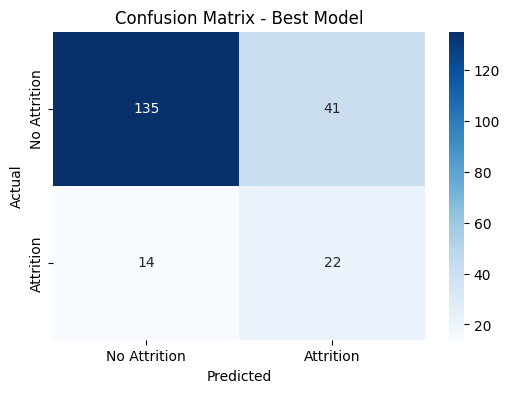

In [50]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_final, y_pred)

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Model')
plt.show()

## Interpretation

In [51]:
# Modified code for correct feature importance mapping
def get_correct_feature_names():
    # Get original categorical features
    cat_features = selected_categorical_features
    
    # Get original numerical features
    num_features = selected_numerical_features
    
    # Combine in same order as training data
    all_features = cat_features + num_features
    
    # Create feature importance mapping
    feature_importance_map = dict(zip(range(len(all_features)), all_features))
    
    return all_features, feature_importance_map

# Get correct feature names
all_features, feature_map = get_correct_feature_names()

# Create DataFrame with correct feature mapping
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

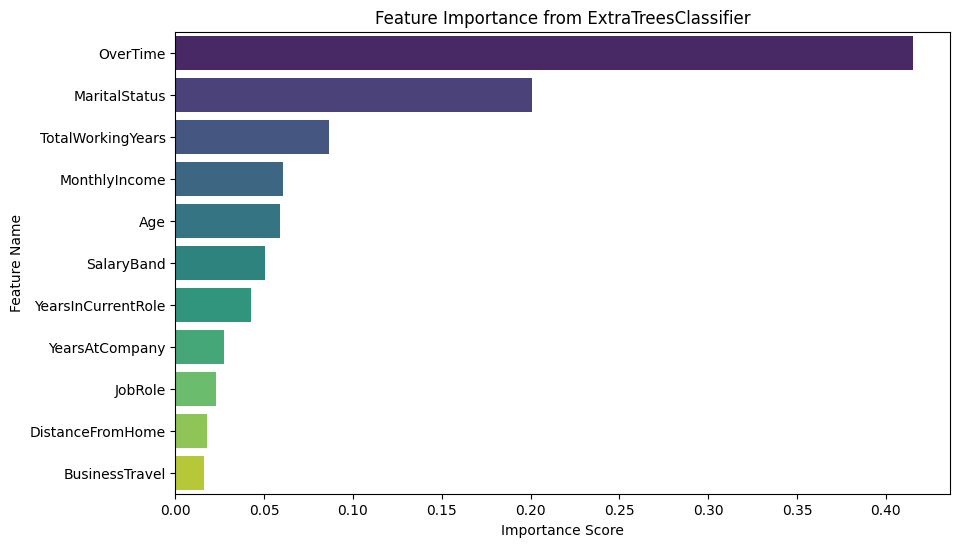

In [52]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from ExtraTreesClassifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

Visualisasi *bar chart* horizontal ini menampilkan skor pentingnya (Importance Score) dari setiap fitur yang digunakan oleh model `ExtraTreesClassifier` dalam membuat prediksi. Fitur diurutkan berdasarkan kontribusi terbesarnya.

-   `OverTime` adalah fitur dengan skor kepentingan tertinggi, menunjukkan kontribusi paling signifikan (skor ~0.42).
-   `MaritalStatus` menempati posisi kedua dengan skor kepentingan yang juga tinggi (skor ~0.20).
-   Fitur-fitur seperti `TotalWorkingYears` (skor ~0.09), `MonthlyIncome` (skor ~0.06), dan `Age` (skor ~0.06) juga menunjukkan kontribusi yang cukup berarti.
-   Fitur seperti `BusinessTravel`, `DistanceFromHome`, dan `JobRole` memiliki skor kepentingan yang lebih rendah dalam model ini.
-   Grafik ini membantu mengidentifikasi faktor-faktor kunci yang paling dipertimbangkan model dalam prediksinya.

In [53]:
# Display feature importance table
print(importance_df)

               Feature  Importance
0             OverTime        0.42
3        MaritalStatus        0.20
8    TotalWorkingYears        0.09
7        MonthlyIncome        0.06
5                  Age        0.06
2           SalaryBand        0.05
10  YearsInCurrentRole        0.04
9       YearsAtCompany        0.03
1              JobRole        0.02
6     DistanceFromHome        0.02
4       BusinessTravel        0.02


In [55]:
# Get index of 'OverTime' in feature list
overtime_idx = all_features.index('OverTime')

# Simulate reducing OverTime by setting it to 0 for all rows
X_test_reduced_overtime = X_test_final.copy()
X_test_reduced_overtime[:, overtime_idx] = 0  

# Predict with modified test set
y_pred_reduced_overtime = best_model.predict(X_test_reduced_overtime)

# Evaluate performance
print("\nEvaluation Report After Reducing Overtime")
print(classification_report(y_test_final, y_pred_reduced_overtime))


Evaluation Report After Reducing Overtime
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       176
           1       0.44      0.19      0.27        36

    accuracy                           0.82       212
   macro avg       0.64      0.57      0.58       212
weighted avg       0.78      0.82      0.79       212



In [56]:
# Convert X_test_final numpy array back to DataFrame with correct feature names
X_test_df = pd.DataFrame(X_test_final, columns=all_features)

In [64]:
# Inverse transform numerical features
X_test_original = X_test_df.copy()
numerical_indices = [all_features.index(col) for col in selected_numerical_features]
X_test_original[selected_numerical_features] = scaler.inverse_transform(X_test_df[selected_numerical_features])

# Create comprehensive results DataFrame with all features
results_df = pd.DataFrame({
    'Actual': y_test_final,
    'Predicted': y_pred,
    'Risk': best_model.predict_proba(X_test_final)[:, 1]  
})

# Add all original features from test set
for feat in all_features:
    if feat in selected_numerical_features:
        # Inverse transform numerical features
        results_df[feat] = scaler.inverse_transform(X_test_df[selected_numerical_features])[:, selected_numerical_features.index(feat)]
    else:
        # Add categorical features
        results_df[feat] = X_test[feat].values

# Show sample predictions with all features
print("\nSample Predictions with All Features:")
print(results_df.head(10))


Sample Predictions with All Features:
      Actual  Predicted  Risk OverTime                    JobRole SalaryBand  \
958        0          0  0.44       No            Sales Executive       High   
824        0          0  0.34       No            Sales Executive  Very High   
1180       1          1  0.60      Yes            Sales Executive  Very High   
613        0          0  0.27       No            Sales Executive       High   
761        0          0  0.27       No  Healthcare Representative       High   
170        0          0  0.31       No  Healthcare Representative  Very High   
927        1          1  0.55      Yes            Human Resources        Low   
695        0          0  0.34       No            Sales Executive       High   
1384       0          1  0.50       No       Sales Representative        Low   
976        0          0  0.28       No     Manufacturing Director     Medium   

     MaritalStatus     BusinessTravel   Age  DistanceFromHome  MonthlyIncome  \


#### **Ringkasan Proyek Analisis Attrition Karyawan**

Proyek ini bertujuan mengidentifikasi faktor-faktor kunci yang memengaruhi **attrition** (pengunduran diri) karyawan dan membangun model prediktif `ExtraTreesClassifier` yang efektif, dioptimasi menggunakan Optuna.

---

**Faktor-Faktor Utama Penyebab Attrition**
Berdasarkan analisis *feature importance* (lihat grafik "Feature Importance from ExtraTreesClassifier"):
*   **`OverTime`**: Menjadi prediktor terkuat (skor ~0.42), menunjukkan karyawan yang lembur memiliki risiko *attrition* tertinggi.
*   **`MaritalStatus`**: Kontributor signifikan kedua (skor ~0.20).
*   **`TotalWorkingYears`**: Total masa kerja juga berperan penting (skor ~0.09).
*   Fitur lain seperti `MonthlyIncome` dan `Age` menunjukkan kontribusi moderat.

---

**Model Prediktif Terbaik (`ExtraTreesClassifier`)**
Setelah optimasi hyperparameter (parameter terbaik: `{'n_estimators': 215, 'max_depth': 11, 'min_samples_split': 0.13399970021595703, 'min_samples_leaf': 0.04206053437992983}`), model menunjukkan performa berikut pada data uji:
*   **Akurasi**: 74.06%
*   **Recall (untuk Attrition=Yes)**: 0.61
*   **F1-Score (untuk Attrition=Yes)**: 0.44
*   **Precision (untuk Attrition=Yes)**: 0.35
*   **Confusion Matrix** (lihat grafik "Confusion Matrix - Best Model"):
    *   Mengidentifikasi 22 dari 36 karyawan yang benar-benar *attrition* (True Positives).
    *   Gagal mengidentifikasi 14 karyawan yang *attrition* (False Negatives).
    Model ini cukup baik dalam menangkap kasus *attrition* aktual, meskipun dengan presisi yang lebih rendah untuk prediksi positif tersebut (41 False Positives).

---

**Rekomendasi Aksi Utama untuk Perusahaan**
1.  **Prioritaskan Manajemen `OverTime`**:
    *   Sebagai faktor dominan, evaluasi kebijakan lembur secara mendalam. Cari cara untuk mengurangi ketergantungan pada lembur berlebihan.
    *   Perhatikan bahwa simulasi pengurangan lembur (dari analisis sebelumnya) dapat meningkatkan akurasi keseluruhan tetapi menurunkan kemampuan deteksi kasus *attrition* sebenarnya (Recall). Strategi pengurangan harus cermat.
2.  **Fokus pada `MaritalStatus`**: Selidiki lebih lanjut bagaimana kategori status pernikahan tertentu memengaruhi *attrition* dan pertimbangkan program dukungan yang relevan.
3.  **Analisis Mendalam Faktor Lain**: Pahami bagaimana `TotalWorkingYears`, `MonthlyIncome`, dan `Age` berkontribusi terhadap risiko *attrition* untuk segmen karyawan yang berbeda.
4.  **Pemanfaatan Model Prediktif**:
    *   Implementasikan model `ExtraTreesClassifier` untuk identifikasi proaktif karyawan yang berisiko tinggi melakukan *attrition*, memungkinkan intervensi retensi yang lebih dini dan tertarget.

## Additional

In [58]:
!pip freeze > requirements.txt

### Dashboard Requirements 

In [59]:
# Create results dataset with predictions
df_results = pd.DataFrame({
    "EmployeeID": X_test.index,
    "Attrition (Actual)": y_test_final,
    "PredictedAttrition": y_pred,
    "Risk (Probability)": best_model.predict_proba(X_test_final)[:, 1]
})

# Add categorical features (original values)
for feature in selected_categorical_features:
    df_results[feature] = X_test[feature]

# Add numerical features (original values)
for feature in selected_numerical_features:
    df_results[feature] = X_test[feature]

# Export additional data with proper feature importance mapping
feature_importance_df = pd.DataFrame({
    "Feature": selected_categorical_features + selected_numerical_features,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Export to CSV
if not os.path.exists('dataset'):
    os.makedirs('dataset')

# Export to CSV in dataset folder
df_results.to_csv("dataset/dashboard_prediction_results.csv", index=False)
feature_importance_df.to_csv("dataset/dashboard_feature_importance.csv", index=False)

# Verify the data
print("\nFirst few rows of exported data:")
print(df_results.head())


First few rows of exported data:
      EmployeeID  Attrition (Actual)  PredictedAttrition  Risk (Probability)  \
958          958                   0                   0                0.44   
824          824                   0                   0                0.34   
1180        1180                   1                   1                0.60   
613          613                   0                   0                0.27   
761          761                   0                   0                0.27   

     OverTime                    JobRole SalaryBand MaritalStatus  \
958        No            Sales Executive       High        Single   
824        No            Sales Executive  Very High        Single   
1180      Yes            Sales Executive  Very High        Single   
613        No            Sales Executive       High       Married   
761        No  Healthcare Representative       High       Married   

         BusinessTravel  Age  DistanceFromHome  MonthlyIncome  \
958  

In [60]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 958 to 972
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   EmployeeID          212 non-null    int64   
 1   Attrition (Actual)  212 non-null    int32   
 2   PredictedAttrition  212 non-null    int32   
 3   Risk (Probability)  212 non-null    float64 
 4   OverTime            212 non-null    object  
 5   JobRole             212 non-null    object  
 6   SalaryBand          212 non-null    category
 7   MaritalStatus       212 non-null    object  
 8   BusinessTravel      212 non-null    object  
 9   Age                 212 non-null    int64   
 10  DistanceFromHome    212 non-null    int64   
 11  MonthlyIncome       212 non-null    int64   
 12  TotalWorkingYears   212 non-null    int64   
 13  YearsAtCompany      212 non-null    int64   
 14  YearsInCurrentRole  212 non-null    int64   
dtypes: category(1), float64(1), int32(2), int64

### Save Clean Dataset

In [61]:
# Copy original dataset and clean it
df_dashboard = df.copy()
df_dashboard = df_dashboard.dropna()

# Rename EmployeeId column if it exists to avoid duplication
if 'EmployeeId' in df_dashboard.columns:
    df_dashboard = df_dashboard.rename(columns={'EmployeeId': 'EmployeeID'})

# Add EmployeeID if not exists
if 'EmployeeID' not in df_dashboard.columns:
    df_dashboard['EmployeeID'] = df_dashboard.index + 1

# Prepare features for prediction
X_cat = encoder.transform(df_dashboard[selected_categorical_features])
X_num = scaler.transform(df_dashboard[selected_numerical_features])   
X = np.hstack([X_cat, X_num])

# Add model predictions
df_dashboard['PredictedAttrition'] = best_model.predict(X)
df_dashboard['Risk (Probability)'] = best_model.predict_proba(X)[:, 1]

# Save full dataset with predictions
df_dashboard.to_csv('dataset/dataset_cleaned_predictions.csv', index=False)

# Print summary
print("\nPrediction Summary:")
print(f"Total predictions made: {len(df_dashboard)}")
print("\nSample of predictions:")
print(df_dashboard[['EmployeeID', 'Attrition', 'PredictedAttrition', 'Risk (Probability)']].head())


Prediction Summary:
Total predictions made: 1058

Sample of predictions:
   EmployeeID  Attrition  PredictedAttrition  Risk (Probability)
1           2       1.00                   0                0.36
2           3       1.00                   1                0.58
3           4       0.00                   0                0.29
6           7       0.00                   1                0.57
7           8       1.00                   0                0.43


### Save Model

In [62]:
import joblib

# Create model directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save model, encoder, and scaler
joblib.dump(best_model, 'model/best_model.joblib')
joblib.dump(encoder, 'model/encoder.joblib')
joblib.dump(scaler, 'model/scaler.joblib')

['model/scaler.joblib']

### Save CSV to SQLite Database

In [3]:
from sqlalchemy import create_engine

# Read CSV files
df_results = pd.read_csv("dataset/dashboard_prediction_results.csv")
df_importance = pd.read_csv("dataset/dashboard_feature_importance.csv")
df_cleaned = pd.read_csv("dataset/dataset_cleaned_predictions.csv")

# Create SQLite database connection in model folder
engine = create_engine('sqlite:///model/metabase.db')

# Save all tables to SQLite database
df_results.to_sql('employee_predictions', engine, if_exists='replace', index=False)
df_importance.to_sql('feature_importance', engine, if_exists='replace', index=False)
df_cleaned.to_sql('employee_data', engine, if_exists='replace', index=False)

print("Data successfully saved to metabase.db:")
print("- employee_predictions table")
print("- feature_importance table") 
print("- employee_data table (cleaned dataset)")

Data successfully saved to metabase.db:
- employee_predictions table
- feature_importance table
- employee_data table (cleaned dataset)
